[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       797
           1       0.88      0.45      0.60       372

    accuracy                           0.81      1169
   macro avg       0.83      0.71      0.74      1169
weighted avg       0.82      0.81      0.78      1169



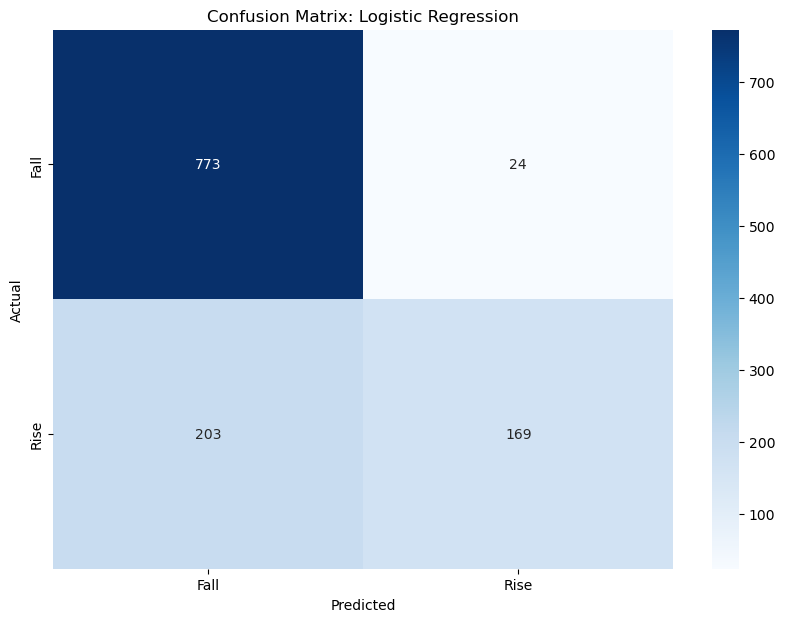

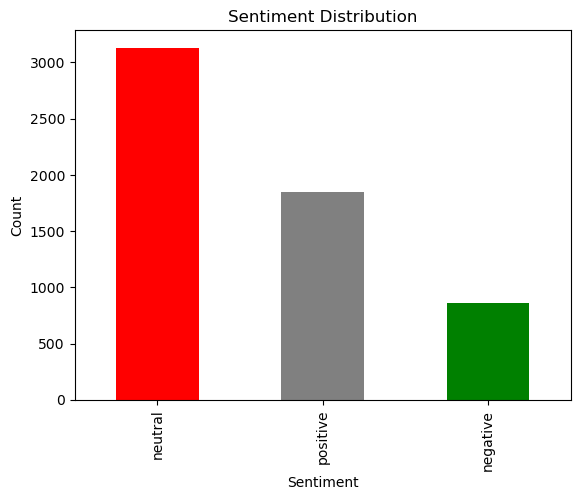

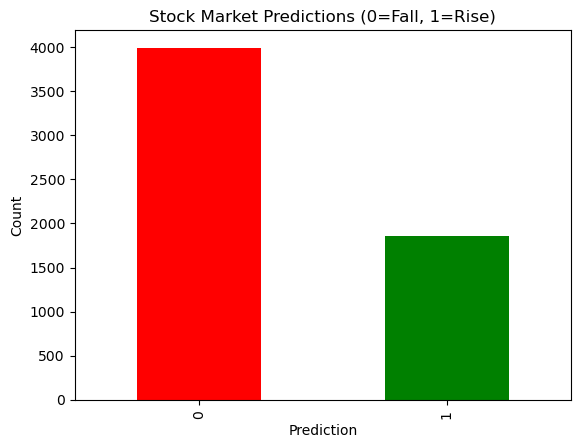


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       797
           1       0.78      0.59      0.67       372

    accuracy                           0.82      1169
   macro avg       0.80      0.75      0.77      1169
weighted avg       0.81      0.82      0.81      1169



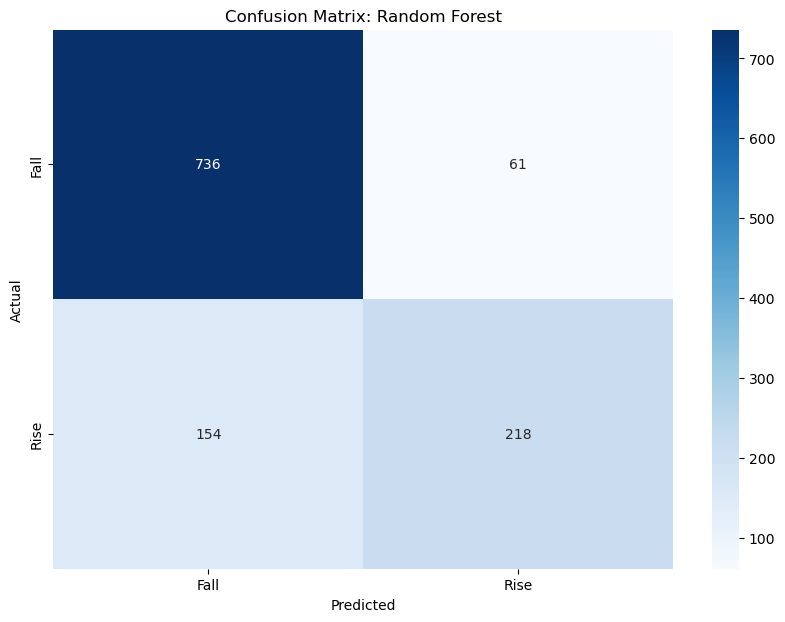

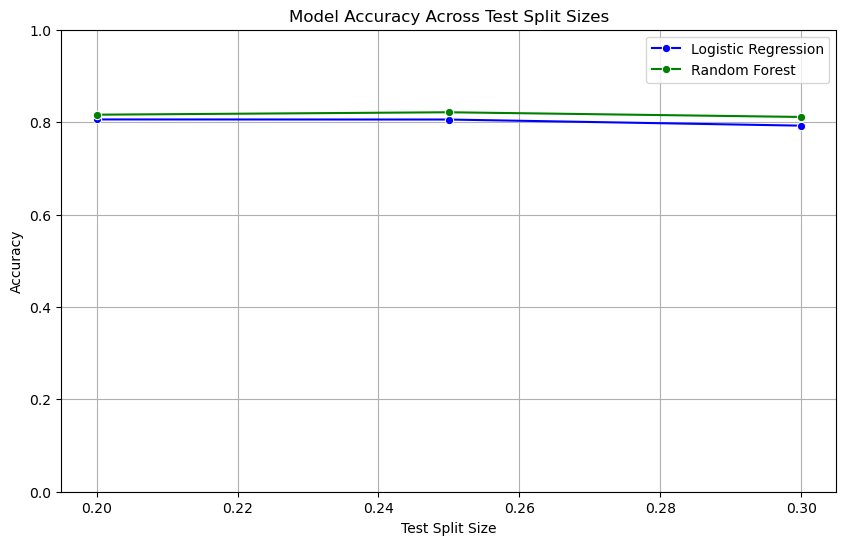

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
import nltk

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv(r'D:\ADM\ADM Project\data.csv')

# Display a preview of the dataset
print(data.head())

# Preprocess the data
data = data.dropna(subset=['Sentence'])  # Remove rows with missing text entries
data['Sentence'] = data['Sentence'].str.lower()  # Convert text to lowercase

# Eliminate stopwords
stop_words_set = set(stopwords.words('english'))
data['Sentence'] = data['Sentence'].apply(lambda text: ' '.join(word for word in text.split() if word not in stop_words_set))

# Map sentiments to binary predictions (1 for positive, 0 otherwise)
data['stock_prediction'] = data['Sentiment'].apply(lambda sentiment: 1 if sentiment == 'positive' else 0)

# Split dataset into input features and target variable
X = data['Sentence']
y = data['stock_prediction']

# Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF vectorization to text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_vectors, y_train)

# Predict outcomes using the trained Logistic Regression model
y_predicted = logistic_model.predict(X_test_vectors)

# Evaluate Logistic Regression model performance
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_predicted))

# Visualize the confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Fall', 'Rise'], yticklabels=['Fall', 'Rise'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot distribution of sentiments in the dataset
sentiment_distribution = data['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['red', 'gray', 'green'], title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot distribution of stock market predictions
stock_prediction_distribution = data['stock_prediction'].value_counts()
stock_prediction_distribution.plot(kind='bar', color=['red', 'green'], title='Stock Market Predictions (0=Fall, 1=Rise)')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

# Train and evaluate a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectors, y_train)

# Predict outcomes using the Random Forest model
rf_predictions = rf_classifier.predict(X_test_vectors)
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_predictions))

# Visualize the confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fall', 'Rise'], yticklabels=['Fall', 'Rise'])
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate model performance for various test split sizes
test_split_sizes = [0.2, 0.25, 0.3]
log_reg_accuracy_scores = []
rf_accuracy_scores = []

for split_size in test_split_sizes:
    # Re-split data based on the current test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=42)
    X_train_vectors = vectorizer.fit_transform(X_train)
    X_test_vectors = vectorizer.transform(X_test)

    # Logistic Regression evaluation
    logistic_model.fit(X_train_vectors, y_train)
    log_reg_predictions = logistic_model.predict(X_test_vectors)
    log_reg_accuracy_scores.append(accuracy_score(y_test, log_reg_predictions))

    # Random Forest evaluation
    rf_classifier.fit(X_train_vectors, y_train)
    rf_predictions = rf_classifier.predict(X_test_vectors)
    rf_accuracy_scores.append(accuracy_score(y_test, rf_predictions))

# Compare accuracies across test split sizes
plt.figure(figsize=(10, 6))
sns.lineplot(x=test_split_sizes, y=log_reg_accuracy_scores, marker='o', label='Logistic Regression', color='blue')
sns.lineplot(x=test_split_sizes, y=rf_accuracy_scores, marker='o', label='Random Forest', color='green')
plt.title('Model Accuracy Across Test Split Sizes')
plt.xlabel('Test Split Size')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()
